In [66]:
# Updated Python script for clustering, fitting, and visualization including silhouette and elbow plot

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the dataset
data_path = 'sample_data/heart.csv'  # Replace with the correct path to your CSV file
heart_data = pd.read_csv(data_path)
print(heart_data.info())

# Data preprocessing: handling missing values, encoding categorical variables, and scaling
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

heart_data_processed = preprocessor.fit_transform(heart_data)
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numerical_features + list(encoded_cat_features) + ['HeartDisease']
heart_data_processed = pd.DataFrame(np.column_stack([heart_data_processed, heart_data['HeartDisease']]),
                                    columns=all_features)







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [67]:
# Function to perform k-means clustering
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans




In [68]:
# Function to determine the optimal number of clusters using the elbow method and silhouette score
def determine_optimal_clusters(data, max_clusters=10):
    inertias = []
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = perform_kmeans(data, k)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return inertias, silhouette_scores



In [69]:
# Visualization of clusters with centers
def plot_clusters_with_centers(X, kmeans):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5, label='Clusters')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x', label='Centers')
    plt.title('Visualization of Clusters with Centers')
    plt.xlabel('Scaled Feature 1')
    plt.ylabel('Scaled Feature 2')
    plt.legend()
    plt.show()



In [70]:


# Heatmap of feature correlations
def plot_heatmap(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap of Feature Correlations')
    plt.show()

# Scatter plot (Age vs MaxHR)
def plot_age_maxhr_scatter(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Age'], data['MaxHR'], c=data['HeartDisease'], cmap='winter')
    plt.title('Scatter Plot of Age vs MaxHR')
    plt.xlabel('Age')
    plt.ylabel('Max Heart Rate')
    plt.colorbar(label='Heart Disease (0 = No, 1 = Yes)')
    plt.show()

# Plot the elbow method and silhouette scores
def plot_elbow_silhouette(range_clusters, inertias, silhouette_scores):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Elbow plot
    ax1.plot(range_clusters, inertias, marker='o')
    ax1.set_title('Elbow Method For Optimal k')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia')
    ax1.grid(True)

    # Silhouette scores plot
    ax2.plot(range_clusters, silhouette_scores, marker='o', color='r')
    ax2.set_title('Silhouette Scores For Various Clusters')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.grid(True)

    plt.show()

# Function for creating a bar chart for categorical features
def plot_bar_chart(data, feature):
    """
    Plots a bar chart of the categorical feature.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - feature: string, the name of the categorical feature to be visualized.
    """
    counts = data[feature].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# Function for creating a histogram for numerical features
def plot_histogram(data, feature):
    """
    Plots a histogram of the numerical feature.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - feature: string, the name of the numerical feature to be visualized.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()





In [71]:
# Function to fit a linear regression model
def fit_linear_regression(X, y):
    """
    Fits a linear regression model to the data and calculates the R-squared value.

    Parameters:
    - X: Features DataFrame or numpy array.
    - y: Target variable Series or numpy array.

    Returns:
    - model: Trained Linear Regression model.
    - r_squared: R-squared value, representing the confidence in the model.
    """
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    r_squared = model.score(X, y)  # Calculate R-squared
    print(f"R-squared value: {r_squared}")
    return model, r_squared

def fit_logistic_regression(X_train, y_train, X_test=None):
    """
    Fits a logistic regression model to the data and returns predictions along with confidence scores.

    Parameters:
    - X_train: Training features DataFrame or numpy array.
    - y_train: Training target variable Series or numpy array.
    - X_test: Test features DataFrame or numpy array for which to make predictions.

    Returns:
    - predictions: Array of predicted classes.
    - confidence_scores: Array of probabilities representing confidence in predictions.
    """
    model = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence
    model.fit(X_train, y_train)

    # Use X_train as X_test if no X_test is provided
    if X_test is None:
        X_test = X_train
        using_training_data = True
    else:
        using_training_data = False

    confidence_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    predictions = model.predict(X_test)

    if using_training_data:
        print("No separate test data provided; using training data for predictions and confidence scores.")
    print("Confidence scores:", confidence_scores)
    return model, predictions, confidence_scores



In [72]:
def plot_logistic_regression_fit(X, y, model, feature_to_plot):
    """
    Plots the logistic regression fitting results.

    Parameters:
    - X: Features DataFrame.
    - y: Target variable Series.
    - model: Trained Logistic Regression model.
    - feature_to_plot: string, the name of the feature to plot on the x-axis.
    """
    # Create a grid of values for the feature to plot
    feature_values = np.linspace(X[feature_to_plot].min(), X[feature_to_plot].max(), 200)

    # Create a DataFrame with the grid of feature values
    X_plot = pd.DataFrame(feature_values, columns=[feature_to_plot])

    # If the model was trained on multiple features, ensure all other features are held constant
    # Here, we use the mean value of the other features from the training data
    for feature in X.columns:
        if feature != feature_to_plot:
            X_plot[feature] = X[feature].mean()

    # Make predictions using the grid of feature values
    probabilities = model.predict_proba(X_plot)[:, 1]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X[feature_to_plot], y, color='blue', label='Actual data', alpha=0.5)
    plt.plot(feature_values, probabilities, color='red', label='Logistic Regression Fit')

    plt.xlabel(feature_to_plot)
    plt.ylabel('Probability of Heart Disease')
    plt.title(f'Logistic Regression Fit for {feature_to_plot}')
    plt.legend()
    plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

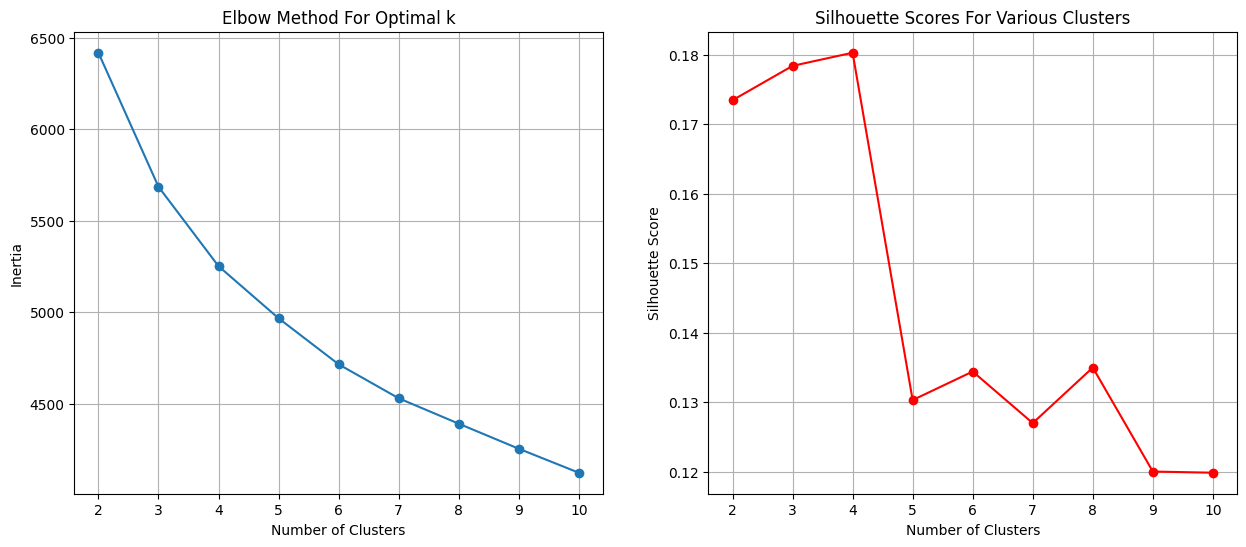

In [73]:


# Determine optimal clusters
range_clusters = range(2, 11)  # Range from 2 to 10 clusters
inertias, silhouette_scores = determine_optimal_clusters(heart_data_processed.drop(columns='HeartDisease'), max_clusters=10)
plot_elbow_silhouette(list(range_clusters), inertias, silhouette_scores)



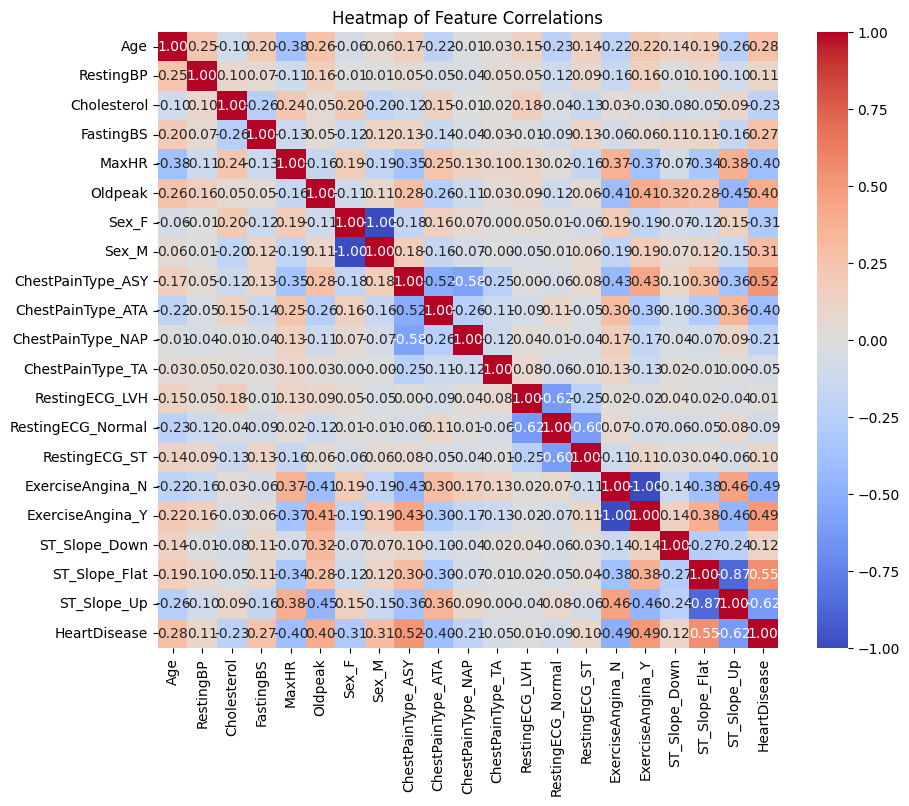

In [74]:
# Heatmap visualization
plot_heatmap(heart_data_processed)



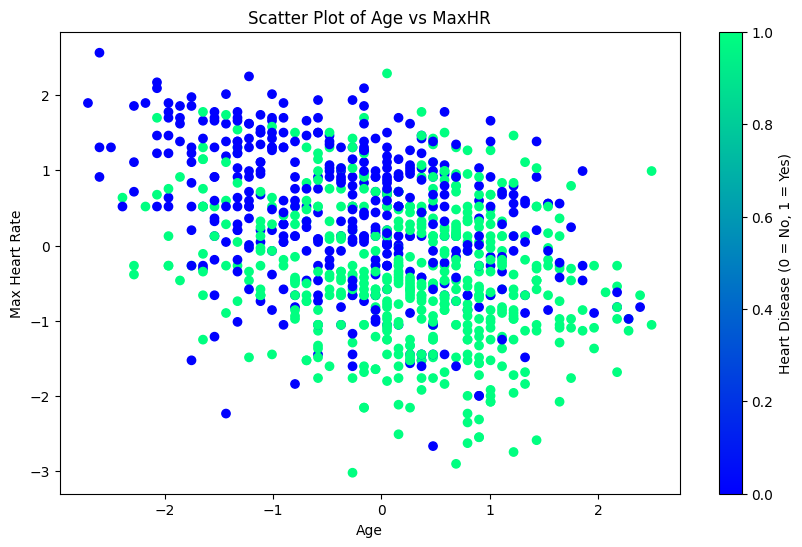

In [75]:
# Scatter plot visualization
plot_age_maxhr_scatter(heart_data_processed)



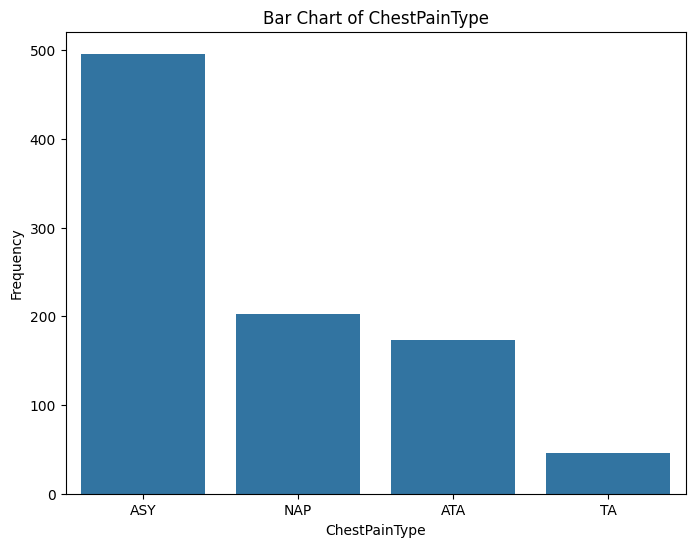

In [76]:
# Plot bar chart for a categorical feature, e.g., 'ChestPainType'
plot_bar_chart(heart_data, 'ChestPainType')



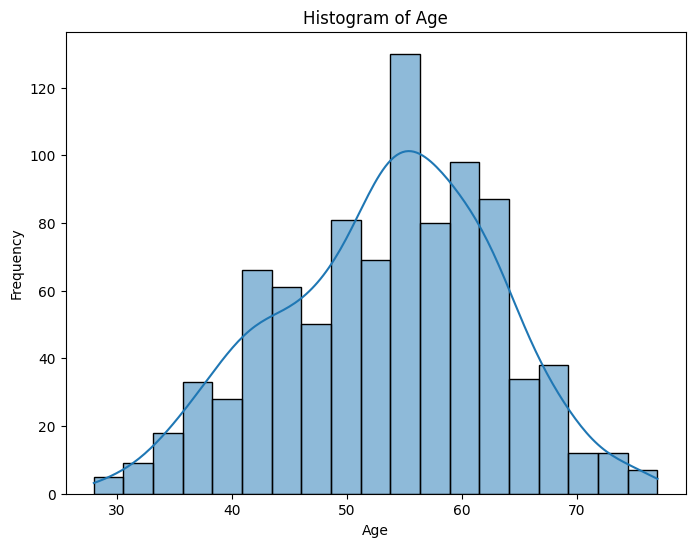

In [77]:
# Plot histogram for a numerical feature, e.g., 'Age'
plot_histogram(heart_data, 'Age')




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


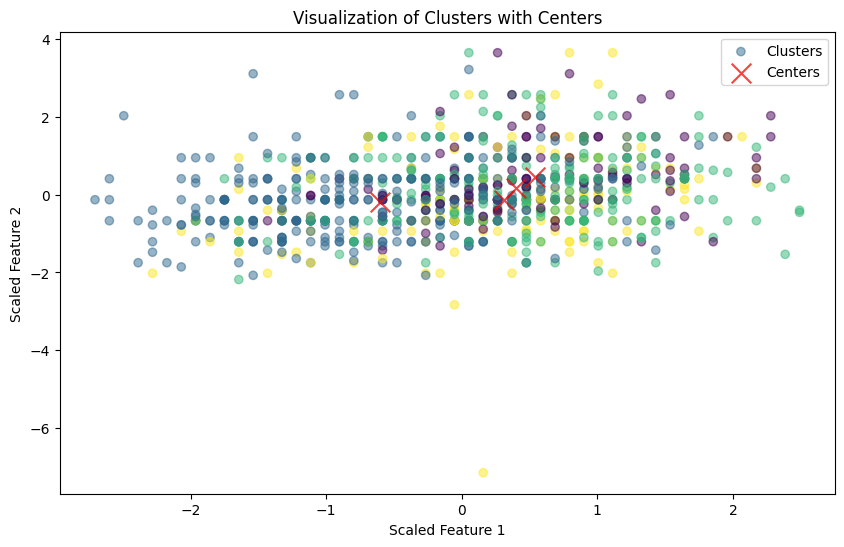

In [78]:
# Clustering analysis with the optimal number of clusters
optimal_k = 4
kmeans_optimal = perform_kmeans(heart_data_processed.drop(columns='HeartDisease').values, optimal_k)
plot_clusters_with_centers(heart_data_processed.drop(columns='HeartDisease').values, kmeans_optimal)


Confidence scores: [0.16897645 0.40256595 0.62364784 0.704838   0.67956172 0.14855711
 0.23846476 0.5284889  0.45552271 0.56743461 0.36638313 0.84477728
 0.36920319 0.47284143 0.44817062 0.4136043  0.23718414 0.27600466
 0.67004083 0.21179329 0.41105275 0.45373655 0.33074054 0.31335914
 0.41866842 0.1617156  0.68642829 0.61867023 0.40500397 0.494964
 0.34354984 0.76184212 0.65720061 0.52415227 0.35747802 0.21856076
 0.86101783 0.3704689  0.45371123 0.54327155 0.59700188 0.74248852
 0.17093647 0.27499108 0.61280103 0.6398183  0.20428959 0.28978071
 0.09286827 0.18312207 0.62148969 0.76127181 0.57590436 0.3208685
 0.54837871 0.3139804  0.21268369 0.57668899 0.45133599 0.71783845
 0.23469125 0.1907695  0.41442476 0.51774365 0.47323064 0.41027939
 0.35440563 0.11586343 0.84324    0.14083168 0.48545849 0.47848726
 0.47276241 0.6214949  0.58863314 0.67574847 0.18385138 0.32998215
 0.62989142 0.28905683 0.34957514 0.4144061  0.76968609 0.35386182
 0.66304453 0.90342394 0.77431688 0.5119784  0

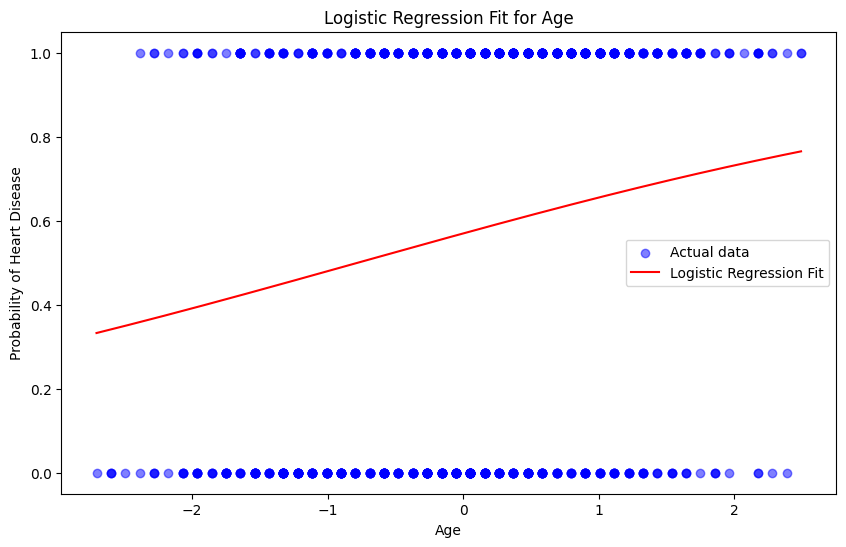

In [79]:
# Fit linear regression
# Features selected for model fitting
selected_features = ['Age', 'Cholesterol', 'MaxHR']
X = heart_data_processed[selected_features]
y = heart_data_processed['HeartDisease']

# Fit logistic regression and plot the fitting results
logistic_model, predictions, confidence_scores = fit_logistic_regression(X, y, X)
# Plot the fitting results for 'Age'
plot_logistic_regression_fit(X, y, logistic_model, 'Age')